# **CSE438 : APPLIED DATA SCIENCE FOR PRACTITIONERS** <br/>
**ASSIGNMENT 01**

Shaiane Prema Baroi <br/>
21101098 <br/>
Section 01 <br/>

**IMPORTING THE NECESSARY LIBRARIES**

In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
from sklearn import tree

**LOADING THE DATASET**

In [74]:
#LOADING THE DATASET
ecommerce = pd.read_csv("/content/drive/MyDrive/CSE438/ecommerce.csv")

**DISPLAYING THE DATASET**

In [75]:
ecommerce.shape

(10998, 10)

In [76]:
ecommerce.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [77]:
ecommerce.dtypes

Customer_care_calls     int64
Customer_rating         int64
Prior_purchases         int64
Discount_offered        int64
Weight_in_gms           int64
Warehouse_block        object
Mode_of_Shipment       object
Product_importance     object
Gender                 object
Class                   int64
dtype: object

##**DATA PREPARATION**

**REMOVING NULL VALUES (IF ANY)**

In [78]:
ecommerce[ecommerce.isnull().any(axis = 1)].head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class


In [79]:
ecommerce = ecommerce.dropna()

In [80]:
ecommerce.shape

(10998, 10)

**DATA SAMPLING AND FEATURE SELECTION**

In [81]:
cols = ['Customer_care_calls', 'Prior_purchases', 'Warehouse_block', 'Product_importance', 'Gender', 'Class']
feature_cols = ['Customer_care_calls', 'Prior_purchases', 'Warehouse_block', 'Product_importance', 'Gender']
data = ecommerce[cols].sample(n=100)
display(data[feature_cols])

,Customer_care_calls,Prior_purchases,Warehouse_block,Product_importance,Gender
1116,6,4,C,low,M
9886,5,2,B,low,F
3075,7,4,F,medium,F
4654,3,3,C,medium,M
8139,5,3,F,medium,F
...,...,...,...,...,...
2878,5,5,D,medium,F
9202,5,5,F,high,M
6261,4,4,F,medium,M
4128,2,3,D,medium,M


**DATA TYPE**

In [82]:
data.dtypes

Customer_care_calls     int64
Prior_purchases         int64
Warehouse_block        object
Product_importance     object
Gender                 object
Class                   int64
dtype: object

**DISPLAYING THE NEWLY PREPARED DATASET**

In [83]:
data

,Customer_care_calls,Prior_purchases,Warehouse_block,Product_importance,Gender,Class
1116,6,4,C,low,M,1
9886,5,2,B,low,F,0
3075,7,4,F,medium,F,0
4654,3,3,C,medium,M,1
8139,5,3,F,medium,F,0
...,...,...,...,...,...,...
2878,5,5,D,medium,F,0
9202,5,5,F,high,M,0
6261,4,4,F,medium,M,0
4128,2,3,D,medium,M,0


## **DATA PRE-PROCESSING**

**CHECKING FOR THE LABELS IN THE CATEGORICAL PARAMETERS**

In [84]:
data["Warehouse_block"].unique()

array(['C', 'B', 'F', 'D', 'A'], dtype=object)

In [85]:
data["Product_importance"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [86]:
data["Gender"].unique()

array(['M', 'F'], dtype=object)

**CHECKING FOR THE LABEL COUNTS IN THE CATEGORICAL PARAMETERS**

In [87]:
data["Warehouse_block"].value_counts()

F    33
D    21
B    18
A    15
C    13
Name: Warehouse_block, dtype: int64

In [88]:
data["Product_importance"].value_counts()

medium    51
low       42
high       7
Name: Product_importance, dtype: int64

In [89]:
data["Gender"].value_counts()

F    53
M    47
Name: Gender, dtype: int64

**ONE HOT ENCODING**

In [90]:
feature_cols = ['Customer_care_calls', 'Prior_purchases', 'Warehouse_block', 'Product_importance', 'Gender']
X = data[feature_cols] 
y = data.Class

In [91]:
data_x_encoded = pd.get_dummies(X, drop_first=False)
data_x_encoded

,Customer_care_calls,Prior_purchases,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
1116,6,4,0,0,1,0,0,0,1,0,0,1
9886,5,2,0,1,0,0,0,0,1,0,1,0
3075,7,4,0,0,0,0,1,0,0,1,1,0
4654,3,3,0,0,1,0,0,0,0,1,0,1
8139,5,3,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,5,5,0,0,0,1,0,0,0,1,1,0
9202,5,5,0,0,0,0,1,1,0,0,0,1
6261,4,4,0,0,0,0,1,0,0,1,0,1
4128,2,3,0,0,0,1,0,0,0,1,0,1


## **MODEL TRAINING**

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data_x_encoded, y, test_size = 0.30, random_state = 42) # 70% training and 30% test

In [93]:
data_classifier = DecisionTreeClassifier()
data_classifier.fit(X_train,y_train)
y_pred = data_classifier.predict(X_test)

In [94]:
dtree = DecisionTreeClassifier(criterion ='entropy', max_depth=3)
dtree = dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.7333333333333333

In [95]:
data[feature_cols]

,Customer_care_calls,Prior_purchases,Warehouse_block,Product_importance,Gender
1116,6,4,C,low,M
9886,5,2,B,low,F
3075,7,4,F,medium,F
4654,3,3,C,medium,M
8139,5,3,F,medium,F
...,...,...,...,...,...
2878,5,5,D,medium,F
9202,5,5,F,high,M
6261,4,4,F,medium,M
4128,2,3,D,medium,M


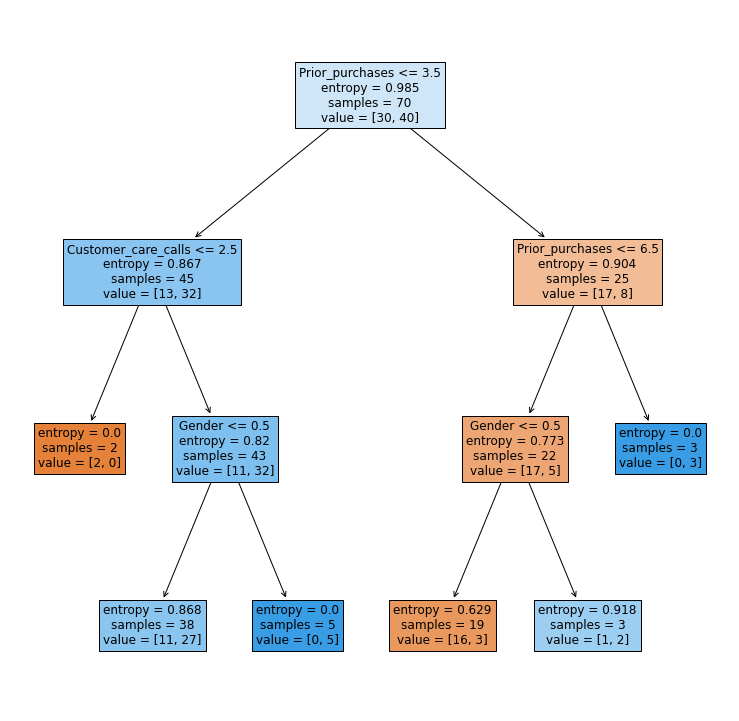

In [96]:
feature_cols = ['Customer_care_calls', 'Prior_purchases', 'Warehouse_block', 'Product_importance', 'Gender']
plt.figure(figsize=(13,13))
tree.plot_tree(dtree, fontsize = 12, feature_names = feature_cols, filled =True)
plt.show()